# Titanic Case Study
<img align="right" width="300" src="https://upload.wikimedia.org/wikipedia/it/5/53/TitanicFilm.jpg">
The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this notebook, we will try to figure out what sorts of people were likely to survive by using ***clustering*** in python.

The **Titanic** dataset became famous after that ***Kaggle*** launched the competition to discover label the passengers as survived or not by exploiting some available features ([link](https://www.kaggle.com/c/titanic)).

**Features description**
- PassengerId is the unique id of the row and it doesn't have any effect on target
- Survived is the target variable we are trying to predict (0 or 1):
1 = Survived
0 = Not Survived
- Pclass (Passenger Class) is the socio-economic status of the passenger and it is a categorical ordinal feature which has 3 unique values (1, 2 or 3):
 1 = Upper Class
 2 = Middle Class
 3 = Lower Class
- Name, Sex and Age are self-explanatory
- SibSp is the total number of the passengers' siblings and spouse
- Parch is the total number of the passengers' parents and children
- Ticket is the ticket number of the passenger
- Fare is the passenger fare
- Cabin is the cabin number of the passenger
- Embarked is port of embarkation and it is a categorical feature which has 3 unique values (C, Q or S):
C = Cherbourg
Q = Queenstown
S = Southampton

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('data/titanic.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

- For numeric data, the result’s index will include count, mean, std, min, max as well as percentiles
- For object data (e.g. strings), the result’s index will include count, unique, top, and freq. The top is the most common value. The freq is the most common value’s frequency.

In [ ]:
df.describe(include="all")
# default: The result will include all numeric columns
# all: All columns of the input will be included in the output

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
df['Sex'].mode()

0    male
Name: Sex, dtype: object

In [ ]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [ ]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

for categorical values
- top in describe all = mode
- freq in describe all = value counts

## Missing Values

In [ ]:
# df.isnull()

In [ ]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Correlation

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

In [ ]:
df['Fare'].corr(df['Age'])
# default it is person's correlation coefficient (measure for linear relationship between numerical attributes)

0.09606669176903894

In [ ]:
df.corr(numeric_only = True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [ ]:
df.corr(numeric_only=True, method='spearman')
# method : {‘pearson’, ‘kendall’, ‘spearman’}

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.034091,0.041010,-0.061161,0.001235,-0.013975
Survived,-0.005007,1.000000,-0.339668,-0.052565,0.088879,0.138266,0.323736
Pclass,-0.034091,-0.339668,1.000000,-0.361666,-0.043019,-0.022801,-0.688032
Age,0.041010,-0.052565,-0.361666,1.000000,-0.182061,-0.254212,0.135051
SibSp,-0.061161,0.088879,-0.043019,-0.182061,1.000000,0.450014,0.447113
Parch,0.001235,0.138266,-0.022801,-0.254212,0.450014,1.000000,0.410074
Fare,-0.013975,0.323736,-0.688032,0.135051,0.447113,0.410074,1.000000


In [ ]:
# lets include also the Sex variable
sex_map = {"male": 0, "female": 1}
df.replace({"Sex": sex_map}).corr(numeric_only=True, method="pearson").style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333
Age,0.036847,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000


In [ ]:
# including sex and embarked variable
embarked_map = {"S": 0, "C": 1, "Q": 2}
df.replace({"Sex": sex_map, "Embarked": embarked_map}).corr(numeric_only=True, method="pearson").style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.036847,-0.057527,-0.001652,0.012658,-0.030555
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307,0.108669
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500,0.043835
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333,0.118593
Age,0.036847,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067,0.012186
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651,-0.060606
Parch,-0.001652,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225,-0.079320
Fare,0.012658,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000,0.063462
Embarked,-0.030555,0.108669,0.043835,0.118593,0.012186,-0.060606,-0.079320,0.063462,1.000000


## Scatter Plots
Look at bivariate data to see clusters of points, outliers, correlations

### Age vs Fare

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

In [ ]:
# plt.scatter(x, y)

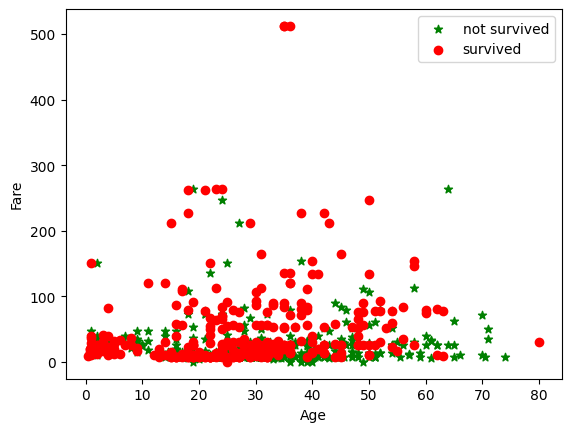

In [ ]:
plt.scatter(df[df['Survived'] == 0]['Age'], df[df['Survived'] == 0]['Fare'], color='g', marker='*', label='not survived')
plt.scatter(df[df['Survived'] == 1]['Age'], df[df['Survived'] == 1]['Fare'], color='r', label='survived')

plt.xlabel('Age')
plt.ylabel('Fare')

plt.legend()
plt.show()

https://seaborn.pydata.org/generated/seaborn.scatterplot.html <br>
in sns we pass the whole dataframe and then specify the attributes we want on the x and y axes, as well as the grouping variable hue. <br>
hue: grouping variable that will produce points with different colors

<Axes: xlabel='Age', ylabel='Fare'>

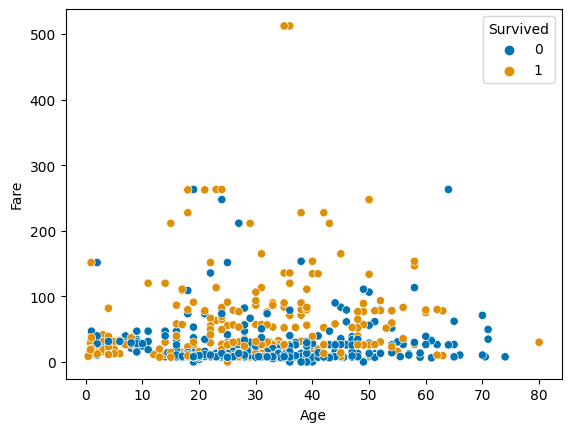

In [ ]:
sns.scatterplot(data=df, x="Age", y="Fare", hue="Survived", palette="colorblind")

<Axes: xlabel='Age', ylabel='Fare'>

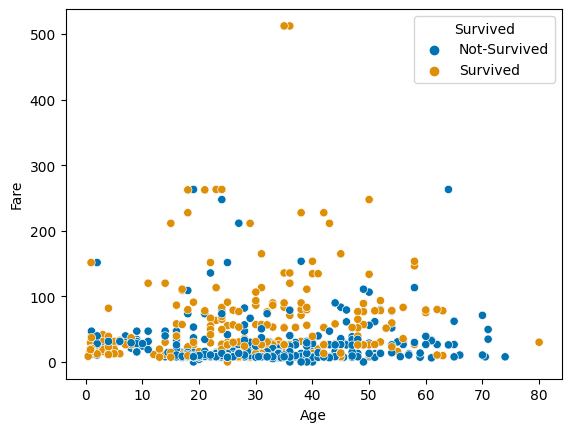

In [ ]:
# mapping 0 to "not survived" and 1 to "survived" for better readibility of the legend
## df.replace returns a copy of the object after replacing. it does not override the df (unless specified with inplace=True)

sns.scatterplot(data=df.replace({"Survived":{0:"Not-Survived", 1:"Survived"}}),
                x="Age", y="Fare", hue="Survived", palette="colorblind")

### Sex vs Fare

https://seaborn.pydata.org/generated/seaborn.stripplot.html <br>
Draws a categorical scatterplot using jitter to reduce overplotting.

<Axes: xlabel='Sex', ylabel='Fare'>

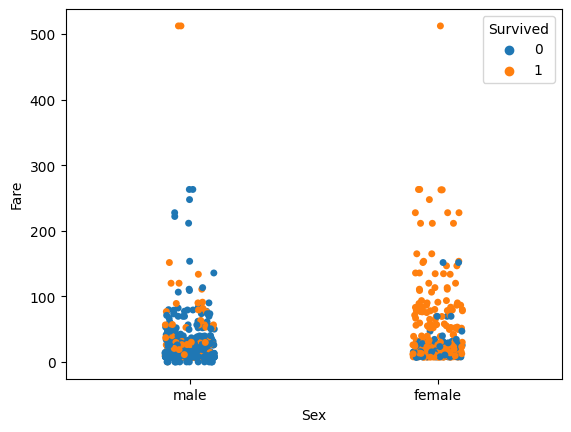

In [ ]:
sns.stripplot(data=df, x="Sex", y="Fare", hue="Survived")

## Pairplot (scatter matrix)
https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html <br>
Draws a matrix of scatter plots.

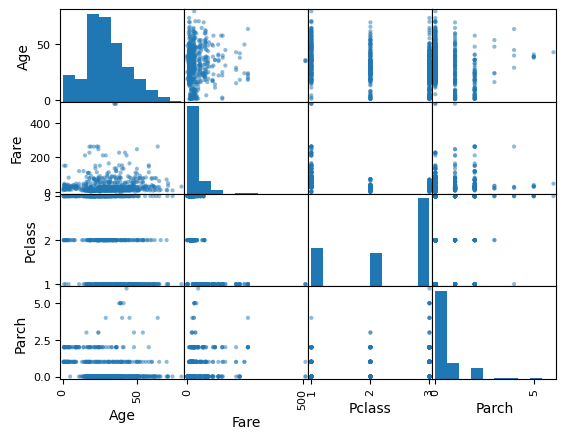

In [ ]:
pd.plotting.scatter_matrix(df[['Age', 'Fare', 'Pclass', 'Parch']])
plt.show()

https://seaborn.pydata.org/generated/seaborn.pairplot.html <br>
diag_kind: Kind of plot for the diagonal subplots. {‘auto’, ‘hist’, ‘kde’, None} <br>
kde: non-parametric way to estimate the probability density function of a random variable

/opt/homebrew/Caskroom/miniforge/base/envs/env_py310/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


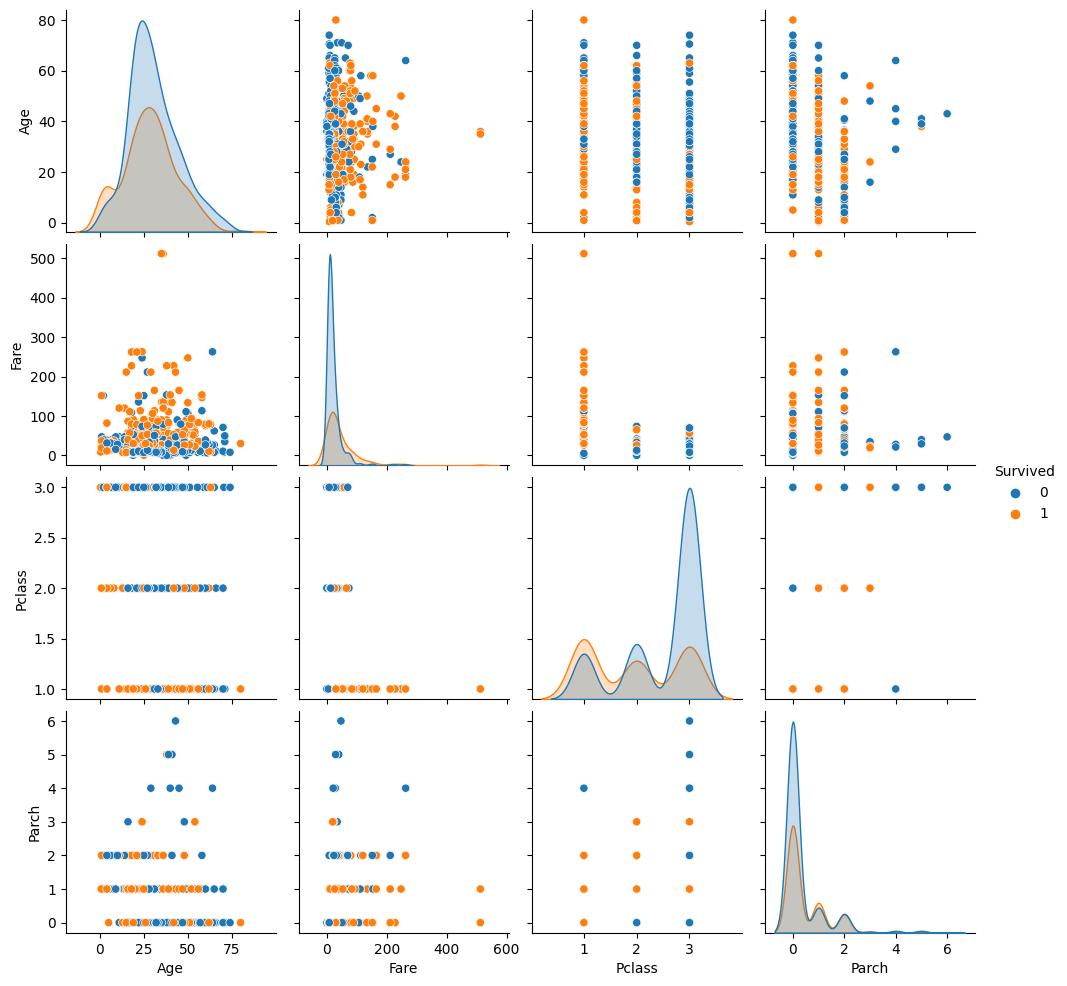

In [ ]:
sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Parch', "Survived"]], hue="Survived", diag_kind="kde")
plt.show()

## Histograms
Shows the frquency distribution for a numerical attribute

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html

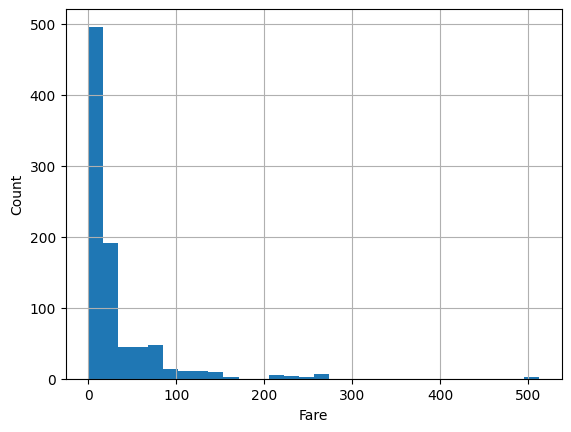

In [ ]:
df['Fare'].hist(bins=30)
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

https://seaborn.pydata.org/generated/seaborn.histplot.html <br>
- hue: Semantic variable that is mapped to determine the color of plot elements.
- multiple: Approach to resolving multiple elements when semantic mapping creates subsets.

dodge -> moves the bars horizontally and reduces their width

<Axes: xlabel='Fare', ylabel='Count'>

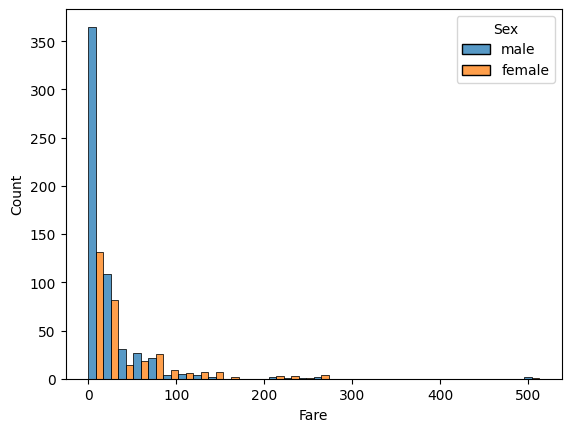

In [ ]:
sns.histplot(data=df, x="Fare", hue="Sex", bins=30, multiple="dodge")

<Axes: xlabel='Fare', ylabel='Count'>

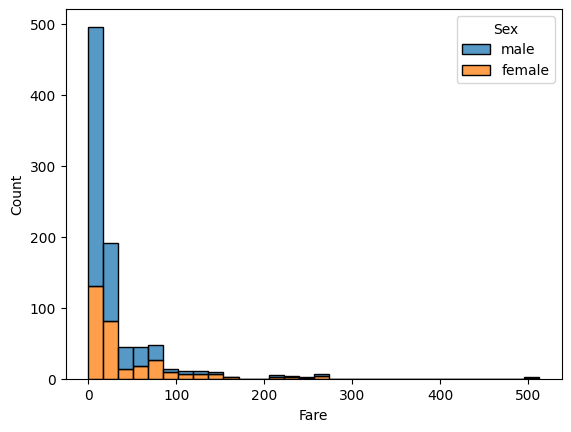

In [ ]:
sns.histplot(data=df, x="Fare", hue="Sex", bins=30, multiple="stack")

## Bar Chart

Pandas counts the number of times a value occurs using values_count() and then plot the bar charts with .plot(kind='bar')

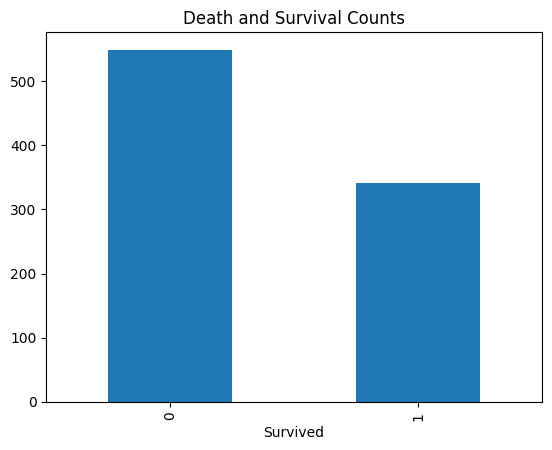

In [ ]:
df['Survived'].value_counts().plot(kind='bar', title='Death and Survival Counts')
plt.show()

https://seaborn.pydata.org/generated/seaborn.countplot.html

Text(0.5, 1.0, 'Death and Survival Counts')

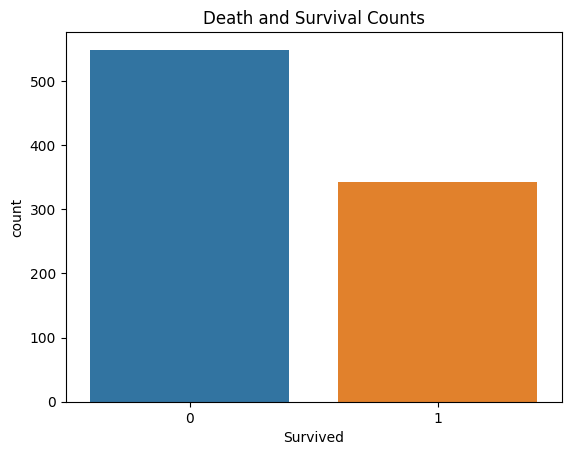

In [ ]:
sns.countplot(data=df, x="Survived")
plt.title("Death and Survival Counts")

Text(0.5, 1.0, 'Sex Count')

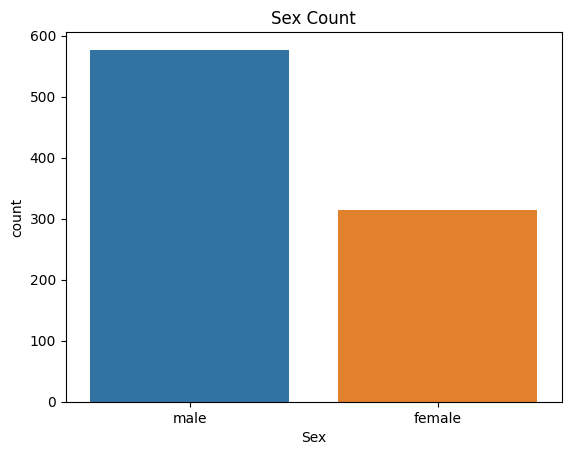

In [ ]:
sns.countplot(data=df, x="Sex")
plt.title("Sex Count")

Text(0.5, 1.0, 'Embarking port Count')

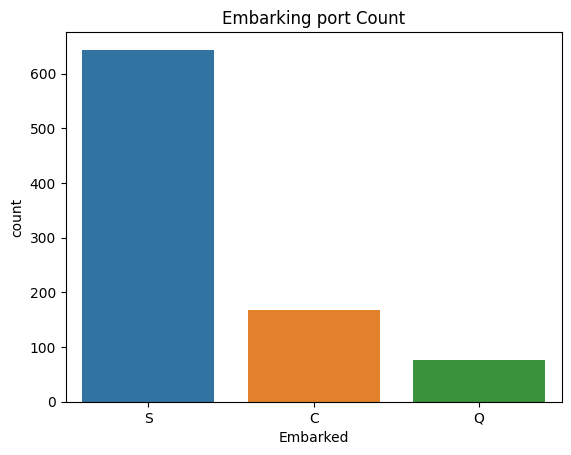

In [ ]:
sns.countplot(data=df, x="Embarked")
plt.title("Embarking port Count")

In [ ]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

<Axes: xlabel='Embarked', ylabel='count'>

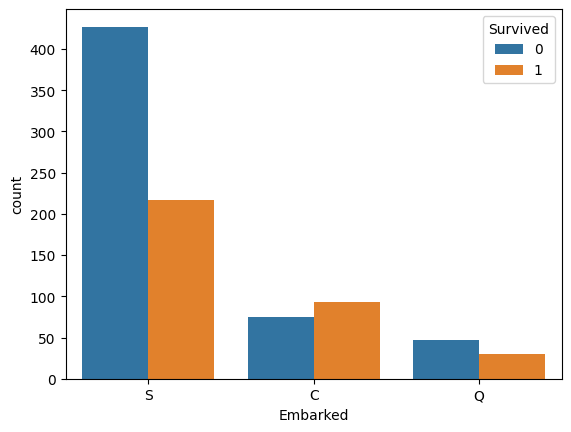

In [ ]:
sns.countplot(data=df, x="Embarked", hue="Survived")

## Plots grid

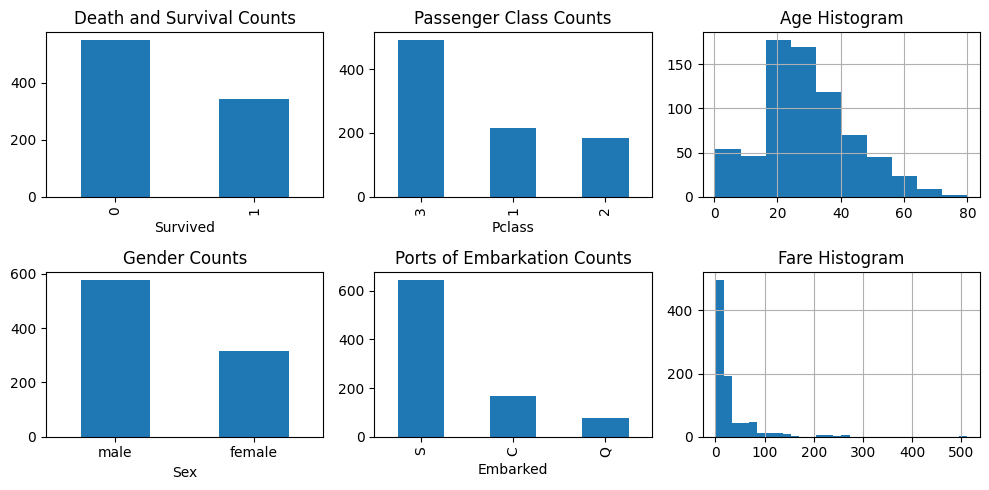

In [ ]:
# Set up a grid of plots
fig = plt.figure(figsize=(10, 5)) # dimensions of the overall plot
fig_dims = (2, 3) # 2 rows, 3 columns

# Plot death and survival counts
plt.subplot2grid(fig_dims, (0, 0))
df['Survived'].value_counts().plot(kind='bar', title='Death and Survival Counts')

# Plot Pclass counts
plt.subplot2grid(fig_dims, (0, 1))
df['Pclass'].value_counts().plot(kind='bar', title='Passenger Class Counts')

# Plot Sex counts
plt.subplot2grid(fig_dims, (1, 0))
df['Sex'].value_counts().plot(kind='bar', title='Gender Counts')
plt.xticks(rotation=0)

# Plot Embarked counts
plt.subplot2grid(fig_dims, (1, 1))
df['Embarked'].value_counts().plot(kind='bar', title='Ports of Embarkation Counts')

# Plot the Age histogram
plt.subplot2grid(fig_dims, (0, 2))
df['Age'].hist()
plt.title('Age Histogram')

# Plot the Fare histogram
plt.subplot2grid(fig_dims, (1, 2))
df['Fare'].hist(bins=30)
plt.title('Fare Histogram')

plt.tight_layout() # Adjust the padding between and around subplots
plt.show()

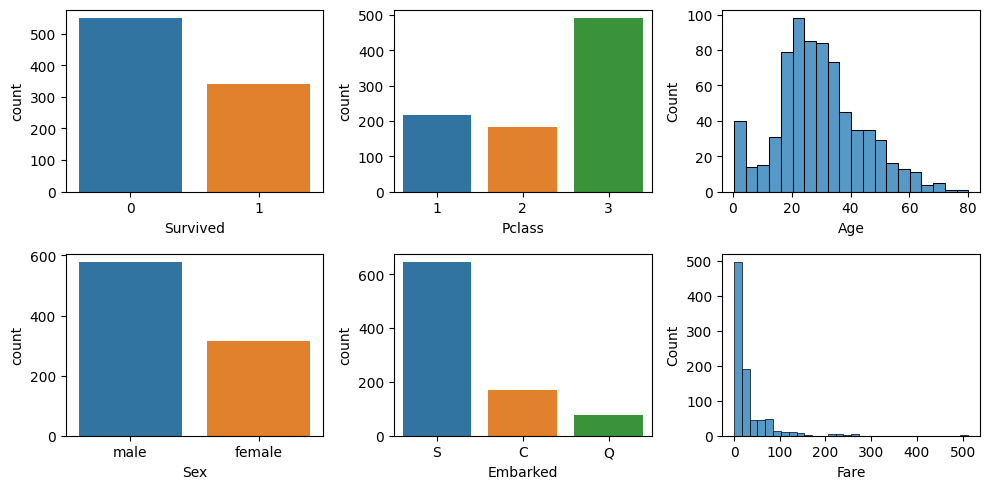

In [ ]:
fig, axs = plt.subplots(2,3, figsize=(10,5)) # 2 rows, 3 columns

sns.countplot(df, x='Survived', ax=axs[0][0])
sns.countplot(df, x='Pclass', ax=axs[0][1])
sns.countplot(df, x='Sex', ax=axs[1][0])
sns.countplot(df, x='Embarked', ax=axs[1][1])

sns.histplot(df, x='Age', ax=axs[0][2])
sns.histplot(df, x='Fare', ax=axs[1][2], bins=30)

plt.tight_layout() # Adjust the padding between and around subplots

## Cross Tab
Cross-tabulation helps us understand the relationship between two or more variables. <br>
https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html

In [ ]:
pclass_xt = pd.crosstab(df['Pclass'], df['Survived'])
pclass_xt

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [ ]:
pclass_xt.sum(1).astype(float)

Pclass
1    216.0
2    184.0
3    491.0
dtype: float64

In [ ]:
# Normalize the cross tab to sum to 1:
# div -> Get Floating division of dataframe and other (scalar, sequence, Series, dict or DataFrame), element-wise
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
pclass_xt_pct

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


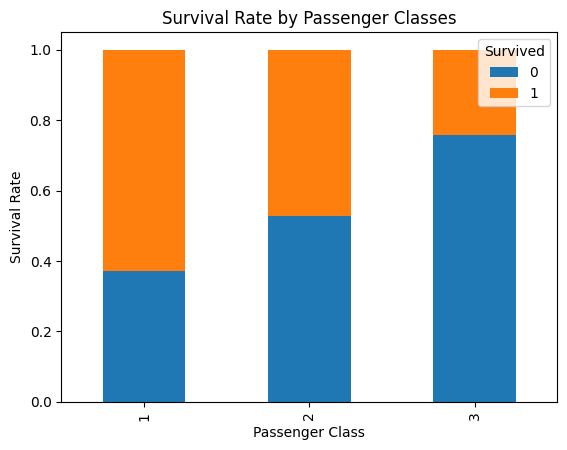

In [ ]:
pclass_xt_pct.plot(kind='bar', stacked=True, title='Survival Rate by Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

In [ ]:
# Sex
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
sexes = sorted(df['Sex'].unique())
genders_mapping = dict(zip(sexes, range(0, len(sexes) + 1)))
genders_mapping

{'female': 0, 'male': 1}

In [ ]:
df['Sex_Val'] = df['Sex'].map(genders_mapping).astype(int) # creates a new attribute to the dataframe
df[['Sex', 'Sex_Val']].head()

,Sex,Sex_Val
0,male,1
1,female,0
2,female,0
3,female,0
4,male,1


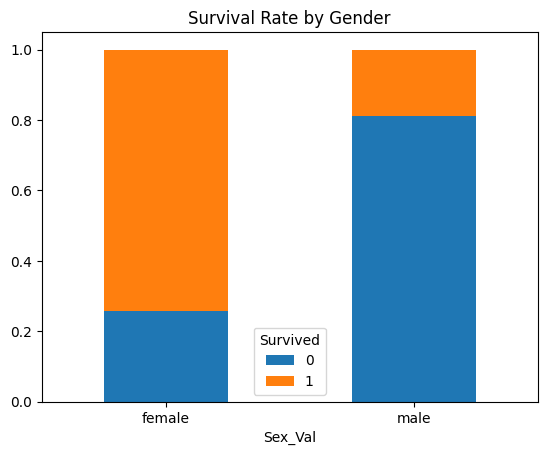

In [ ]:
# putting it all together
sex_val_xt = pd.crosstab(df['Sex_Val'], df['Survived']) # cross tab between sex val and survived
sex_val_xt_pct = sex_val_xt.div(sex_val_xt.sum(1).astype(float), axis=0) # percentage values

sex_val_xt_pct.plot(kind='bar', stacked=True, title='Survival Rate by Gender')
plt.xticks([0, 1], ['female', 'male'], rotation=0)
plt.show()

## Replacing Missing Values

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Sex_Val          0
dtype: int64

### Embarked

In [ ]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0


In [ ]:
embarked_mode = df['Embarked'].mode()[0]
embarked_mode

'S'

In [ ]:
df['Embarked'] = df['Embarked'].fillna(embarked_mode) # fill missing with the mode

In [ ]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val


In [ ]:
# Get the unique values of Embarked, and creates a map
embarked_locs = sorted(df['Embarked'].unique())
embarked_locs_mapping = dict(zip(embarked_locs, range(0, len(embarked_locs) + 1)))
embarked_locs_mapping

{'C': 0, 'Q': 1, 'S': 2}

In [ ]:
# Add new column with the mapped value w.r.t. the embarked attribute
df['Embarked_Val'] = df['Embarked'].map(embarked_locs_mapping).astype(int)
df[['Embarked', 'Embarked_Val']].head()

,Embarked,Embarked_Val
0,S,2
1,C,0
2,S,2
3,S,2
4,S,2


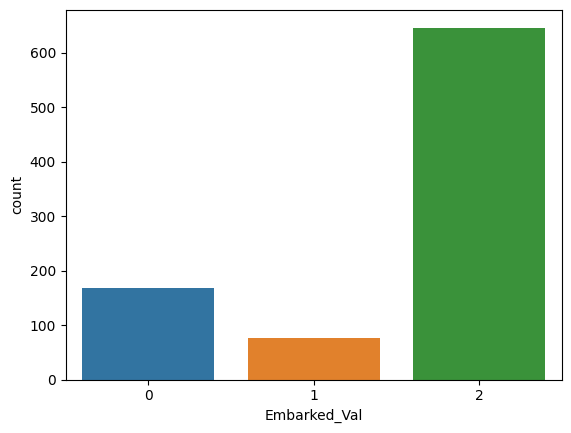

In [ ]:
sns.countplot(data=df, x='Embarked_Val')
plt.show()

In [ ]:
df['Embarked_Val'].isnull().sum()

0

In [ ]:
# the vast majority of passangers embarked in 'S', we assing the missing value as S
# example of assigning missign values based on mapping
if df['Embarked'].isnull().sum() > 0:
    df.replace({'Embarked_Val' : { embarked_locs_mapping[np.nan] : embarked_locs_mapping['S']}}, inplace=True)

Text(0, 0.5, 'Survival Rate')

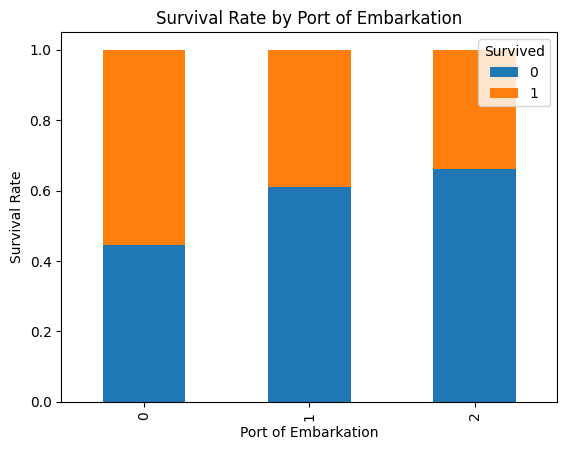

In [ ]:
# let's do survavil rate by port of embarktion in percentage value
embarked_val_xt = pd.crosstab(df['Embarked_Val'], df['Survived']) # cross tab embarked val and survived
embarked_val_xt_pct = embarked_val_xt.div(embarked_val_xt.sum(1).astype(float), axis=0) # percentage values

embarked_val_xt_pct.plot(kind='bar', stacked=True)
plt.title('Survival Rate by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Rate')

### Age

In [ ]:
df['Age'].isnull().sum()

177

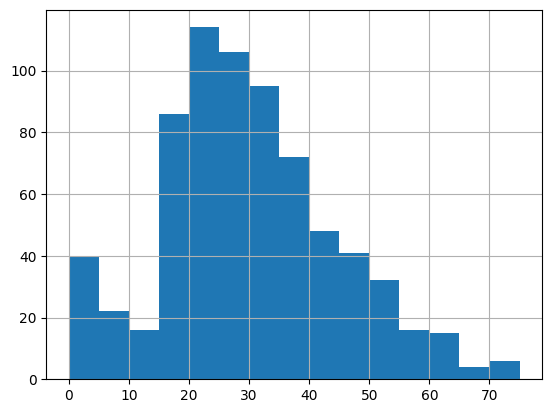

In [ ]:
# If bins is a sequence, gives bin edges, including left edge of first bin and right edge of last bin
df['Age'].hist(bins=np.arange(0,80,5))
plt.show()

In [ ]:
df['Age'].mean()
# np.mean(df['Age'])

29.69911764705882

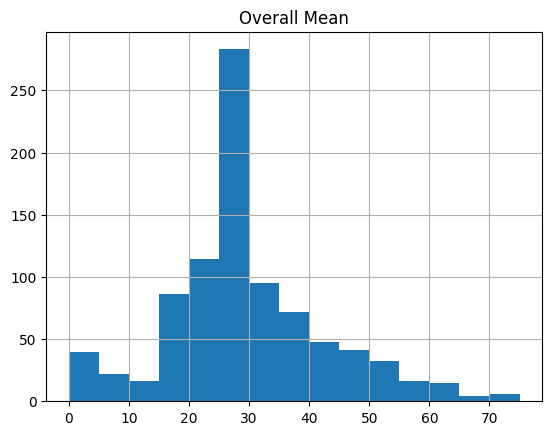

In [ ]:
# fill the missing values with the overall mean
series_overall_mean = df['Age'].fillna(df['Age'].mean())
series_overall_mean.hist(bins=np.arange(0,80,5))
plt.title('Overall Mean')
plt.show()

In [ ]:
# Age mean by Sex and Pclass
df.groupby(['Sex', 'Pclass'])['Age'].mean()

Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64

In [ ]:
def fun_fill_mean(x):
    return x.fillna(x.mean())

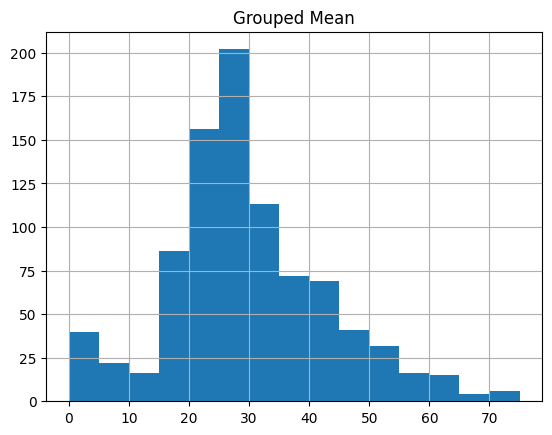

In [ ]:
series_groped_mean = df.groupby(['Sex', 'Pclass'])['Age'].transform(fun_fill_mean)
series_groped_mean.hist(bins=np.arange(0, 80, 5))
plt.title('Grouped Mean')
plt.show()

In [ ]:
def fun_fill_median(x):
    return x.fillna(x.median())

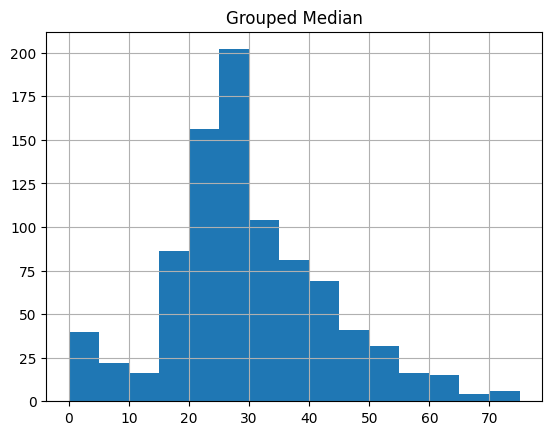

In [ ]:
series_groped_median = df.groupby(['Sex', 'Pclass'])['Age'].transform(fun_fill_median)
series_groped_median.hist(bins=np.arange(0, 80, 5))
plt.title('Grouped Median')
plt.show()

In [ ]:
type(series_groped_median)

pandas.core.series.Series

(0.0, 300.0)

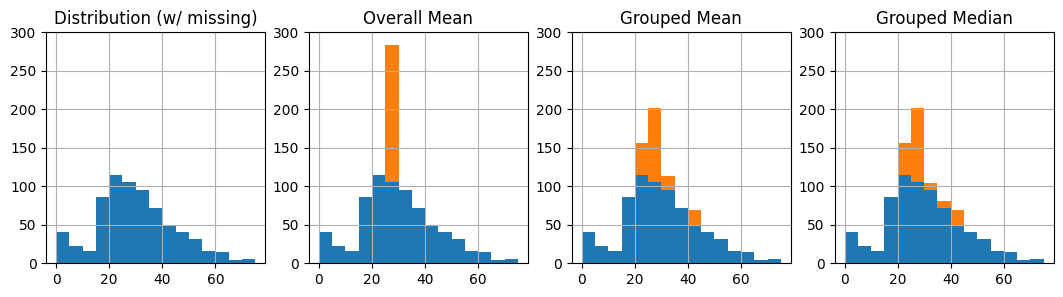

In [ ]:
# Set up a grid of plots
fig = plt.figure(figsize=(13, 3)) # dimensions of the overall plot
fig_dims = (1, 4) # 1 row, 4 columns

plt.subplot2grid(fig_dims, (0, 0))
df['Age'].hist(bins=np.arange(0,80,5))
plt.title('Distribution (w/ missing)')
plt.ylim(0, 300)

plt.subplot2grid(fig_dims, (0, 1))
series_overall_mean.hist(bins=np.arange(0,80,5), color='tab:orange')
df['Age'].hist(bins=np.arange(0,80,5))
plt.title('Overall Mean')
plt.ylim(0, 300)

plt.subplot2grid(fig_dims, (0, 2))
series_groped_mean.hist(bins=np.arange(0, 80, 5), color='tab:orange')
df['Age'].hist(bins=np.arange(0,80,5))
plt.title('Grouped Mean')
plt.ylim(0, 300)

plt.subplot2grid(fig_dims, (0, 3))
series_groped_median.hist(bins=np.arange(0, 80, 5), color='tab:orange')
df['Age'].hist(bins=np.arange(0,80,5))
plt.title('Grouped Median')
plt.ylim(0, 300)

In [ ]:
# we assign the one we decide to be the best
df['Age'] = series_groped_median # or series_groped_mean or series_overall_mean

### Plots

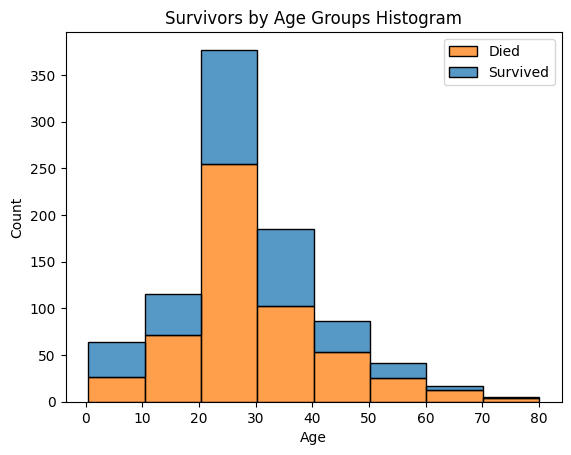

In [ ]:
max_age = df['Age'].max()
bins = int(max_age / 10)

sns.histplot(data=df, x="Age", hue="Survived", bins=bins, multiple="stack", hue_order=[1, 0]) # prima i died e poi i survived
plt.gca().legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by Age Groups Histogram')
plt.show()

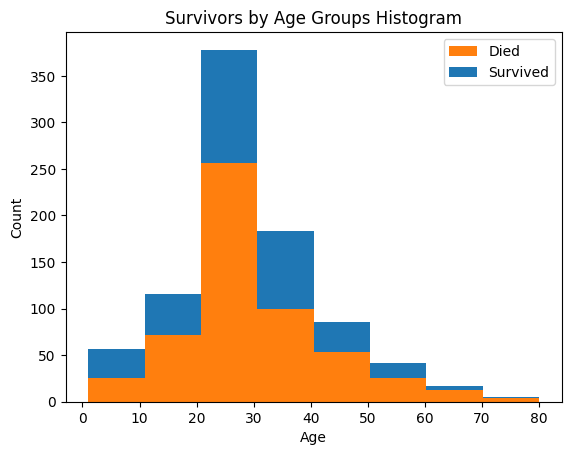

In [ ]:
# Histogram of Age segmented by Survived
df1 = df[df['Survived'] == 0]['Age']
df2 = df[df['Survived'] == 1]['Age']

plt.hist([df1, df2],
             bins=int(max_age / 10), # bin_size
             range=(1, max_age),
             stacked=True,
             color=['tab:orange', 'tab:blue'])

plt.legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by Age Groups Histogram')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

#### KDE plot

<Axes: xlabel='Age', ylabel='Density'>

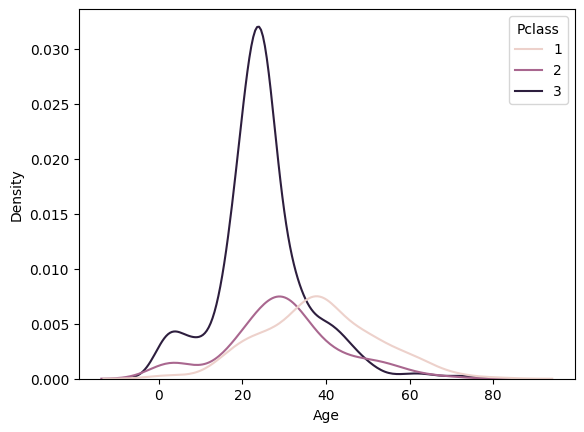

In [ ]:
sns.kdeplot(data=df, x="Age", hue="Pclass")

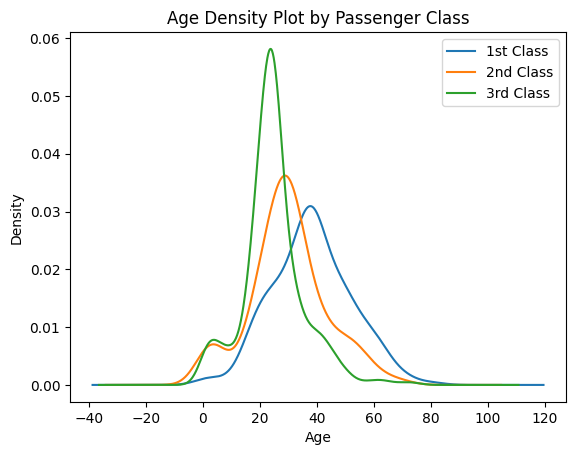

In [ ]:
passenger_classes = sorted(df['Pclass'].unique())
for pclass in passenger_classes:
    df.Age[df.Pclass == pclass].plot(kind='kde') # Generate Kernel Density Estimate plot using Gaussian kernels

plt.title('Age Density Plot by Passenger Class')
plt.xlabel('Age')
plt.legend(('1st Class', '2nd Class', '3rd Class'), loc='best')
plt.show()

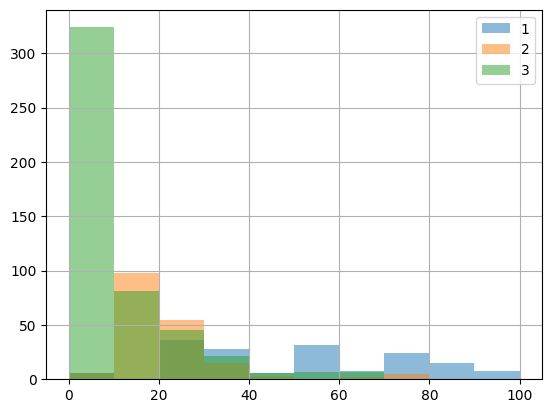

In [ ]:
df[df['Pclass'] == 1]['Fare'].hist(bins=np.arange(0, 110, 10),  label='1', alpha=0.5)
df[df['Pclass'] == 2]['Fare'].hist(bins=np.arange(0, 110, 10), label='2', alpha=0.5)
df[df['Pclass'] == 3]['Fare'].hist(bins=np.arange(0, 110, 10),  label='3', alpha=0.5)
plt.legend()
plt.show()

### Box Plot

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html

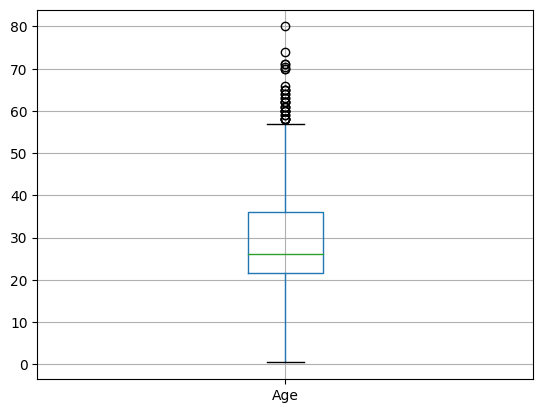

In [ ]:
boxplot = df.boxplot(column=['Age'])

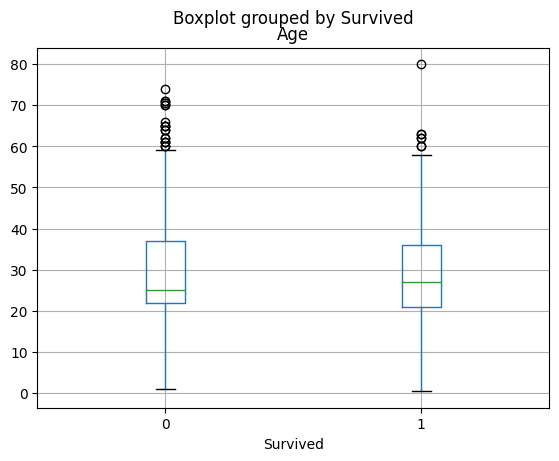

In [ ]:
boxplot = df.boxplot(column=['Age'], by='Survived')

https://seaborn.pydata.org/generated/seaborn.boxplot.html

<Axes: xlabel='Pclass', ylabel='Fare'>

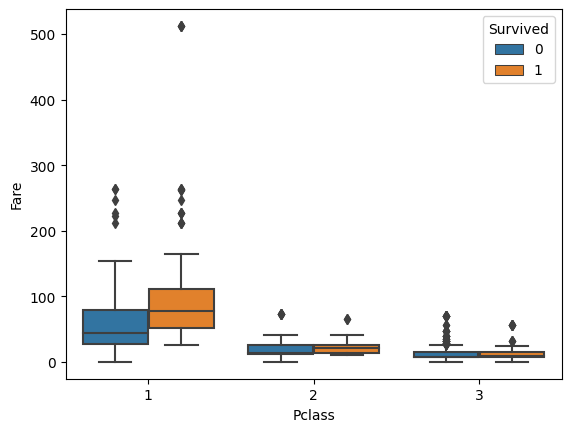

In [ ]:
sns.boxplot(data=df, x="Pclass", y="Fare", hue="Survived")

https://pandas.pydata.org/docs/reference/api/pandas.melt.html <br>
Unpivot a DataFrame from wide to long format, optionally leaving identifiers set.

This function is useful to massage a DataFrame into a format where one or more columns are identifier variables (id_vars), while all other columns, considered measured variables (value_vars), are “unpivoted” to the row axis, leaving just two non-identifier columns, ‘variable’ and ‘value’.

In [ ]:
df_sns = df.melt(value_vars=["Age", "Fare"], id_vars=["Survived", "Pclass", "Sex", "Embarked"])
df_sns

,Survived,Pclass,Sex,Embarked,variable,value
0,0,3,male,S,Age,22.00
1,1,1,female,C,Age,38.00
2,1,3,female,S,Age,26.00
3,1,1,female,S,Age,35.00
4,0,3,male,S,Age,35.00
...,...,...,...,...,...,...
1777,0,2,male,S,Fare,13.00
1778,1,1,female,S,Fare,30.00
1779,0,3,female,S,Fare,23.45
1780,1,1,male,C,Fare,30.00


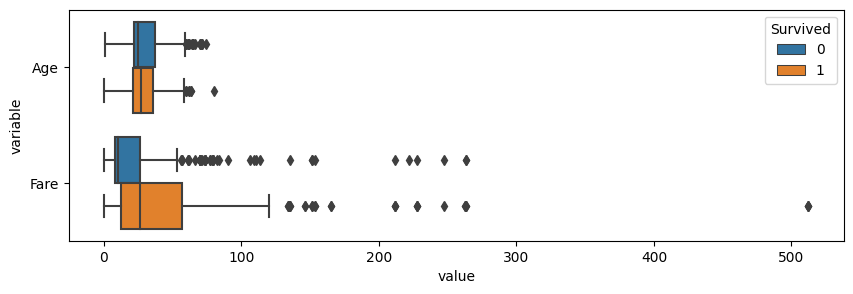

In [ ]:
plt.figure(figsize=(10, 3))
sns.boxplot(data=df_sns, x="value", y="variable", hue="Survived", orient="h")
plt.show()

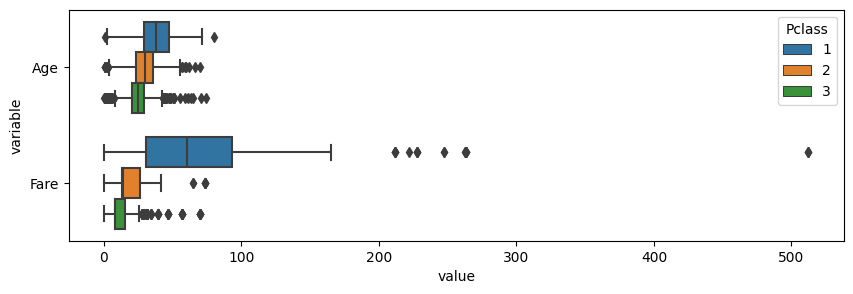

In [ ]:
plt.figure(figsize=(10, 3))
sns.boxplot(data=df_sns, x="value", y="variable", hue="Pclass", orient="h")
plt.show()

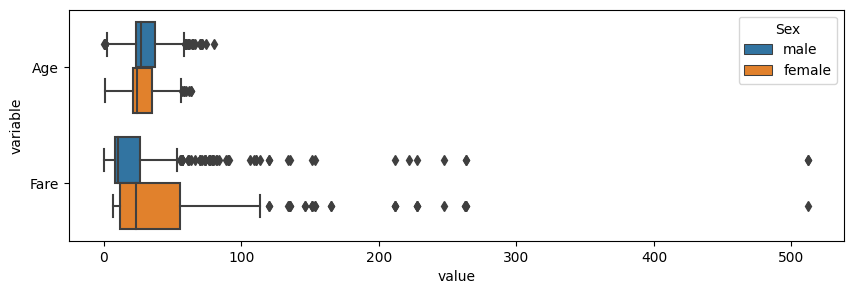

In [ ]:
plt.figure(figsize=(10, 3))
sns.boxplot(data=df_sns, x="value", y="variable", hue="Sex", orient="h")
plt.show()